## Homework 2 solutions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as nx_comm
import numpy as np
import random
from simulation import Simulation


**1. Create an undirected, unweighted ER random graph with N=1000 and p=0.04. Calculate its density.**

In [2]:
N = 1000
p = 0.04
G = nx.gnp_random_graph(N, p, seed=42)

In [3]:
density = nx.density(G)
print(f"Density of one ER graph with {N} nodes and linking probability {p} is {density}")

Density of one ER graph with 1000 nodes and linking probability 0.04 is 0.03967367367367367


Let's check that we get the same results by using the definition of density via number of nodes and edges

In [4]:
density = 2*G.number_of_edges()/(G.number_of_nodes()*(G.number_of_nodes()-1))
print(f"Density of one ER graph with {N} nodes and linking probability {p} is {density}")

Density of one ER graph with 1000 nodes and linking probability 0.04 is 0.03967367367367367


Note that by controlling the seed in `nx.gnp_random_graph` function we make sure that every rerun of the cells lead to the exact same results.

**2. Repeat the previous exercise one hundred times. Report the average and the standard deviation of graph densities crated in these 100 graph realisations.**

In [5]:
dl=[]
for i in range(0,100):
    ERs=nx.erdos_renyi_graph(N,p)
    dl.append(nx.density(ERs))
da=np.array(dl)
print('Average density is %1.4f'%(np.mean(da)))
print('Standarad deviation is %1.4f'%(np.std(da,ddof=1)))

Average density is 0.0400
Standarad deviation is 0.0003


**3. For one of the ER graphs previously realized, calculate the following:<br>
a) the average degree and plot histogram of the degree distribution<br>
b) the average clustering coefficient<br>
c) network diameter<br>
d) average shortest path**<br>

(a) the average degree and plot histogram of the degree distribution

In [6]:
degER=[]
for v in G.nodes():
    degER.append(G.degree(v))
    
# alternatively
degER = list((dict(nx.degree(G))).values())

*Average degree*

In [7]:
avg_deg = np.mean(degER)
print(f"Average degree of ER graph with {N} nodes and linking probability p={p} is {avg_deg}")

Average degree of ER graph with 1000 nodes and linking probability p=0.04 is 39.634


*Histogram of degree distribution*

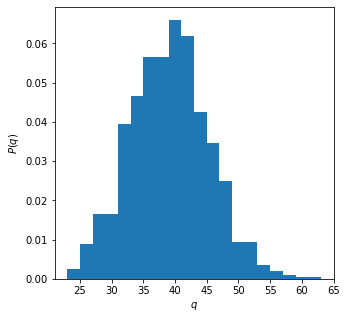

In [8]:
plt.figure(figsize=(5,5))
plt.xlabel("$q$")
plt.ylabel('$P(q)$')
plt.hist(degER, bins=20, density=True, histtype='bar',align='left')
plt.show()

*Average clustering*

In [9]:
cc=nx.average_clustering(G)
print(f"Average clustering of ER graph with {N} nodes and linking probability p = {p} is {cc}")

Average clustering of ER graph with 1000 nodes and linking probability p = 0.04 is 0.040451197937389764


*Network diameter*

In [10]:
d=nx.diameter(G)
print("Dimater ER graph with 1000 nodes and linking probability 0.04 is:", d)

Dimater ER graph with 1000 nodes and linking probability 0.04 is: 3


*Average shortest path*

In [11]:
l=nx.average_shortest_path_length(G)
print("Average shortest path of ER graph with 1000 nodes and linking probability 0.04 is:", l)

Average shortest path of ER graph with 1000 nodes and linking probability 0.04 is: 2.1595935935935935


*This network is quite dense so it is not expected to obtain a network that is disconnected, but in general case the network can be disconnected, so pay attention to the values of diameter and average_shortest_path_length should get in that case!*

**4. What is a critical probability threshold for error failure for one created ER network.**

As we have seen during the classes, for general graph this value is calculated using graph degrees:

$f_{c}=1-\frac{1}{\frac{\langle k^{2} \rangle}{\langle k \rangle}-1}$

In [12]:
def critical_threshold(G):
    
    degrees = list((dict(nx.degree(G))).values())
    
    avg_k = np.mean(degrees)
    avg_k2 = np.mean(np.power(degrees,2))
    # alternatively
    # avg_k2 = np.var(degrees) + np.mean(degrees)**2
    
    f_c = 1 - 1/(avg_k2/avg_k-1)
    
    return(f_c)

In [13]:
fc1 = critical_threshold(G)
print("Critical probability treshold of ER graph with 1000 nodes and linking probability 0.04 is:", fc1)

Critical probability treshold of ER graph with 1000 nodes and linking probability 0.04 is: 0.974753548669838


For ER graphs, there is even simpler equation: 
$f_{c}^{ER}=1-\frac{1}{\langle k \rangle}$

In [14]:
def critical_threshold_ER(G):
    
    degrees = list((dict(nx.degree(G))).values())
    
    avg_k = np.mean(degrees)
    f_c = 1 - 1/avg_k
    
    return(f_c)

In [15]:
fc2=critical_threshold_ER(G)
print("Critical probability treshold of ER graph with 1000 nodes and linking probability 0.04 is:", fc2)

Critical probability treshold of ER graph with 1000 nodes and linking probability 0.04 is: 0.9747691376091234


**5. Given the following degree sequence, M matrix, vector showing memberships of nodes in communities (z), create a network using Degree Corrected Stochastic Block Model with c=5 communities. The input of parameters is given in the cells below. Execute them to get the model parameters. Plot networks with color highlighted community structure.** 

*problem input*

In [16]:
deg_df = pd.read_csv('degree_sequence.csv')
z_df = pd.read_csv('community_membership.csv')

In [17]:
c=5
z = z_df.set_index('node_id').to_dict()['community']
deg = deg_df.set_index('node_id').to_dict()['degree']

M = [[2715, 152, 216, 217, 144],
     [152, 1495, 81, 116, 79],
     [216, 81, 1758, 129, 75],
     [217, 116, 129, 1836, 79],
     [144, 79, 75, 79, 1184]]

Calculate the degree of community

In [18]:
kc=[0,0,0,0,0]
for v in deg.keys():
    kc[z[v]]=kc[z[v]]+deg[v]
print(kc)

[3451, 1932, 2263, 2383, 1565]


Calculate node propensity $\gamma_{i}=\frac{k_{i}}{kc_{z_{i}}}$

In [19]:
gamma=[]
for v in deg.keys():
    x=(1.0*deg[v])/(1.0*kc[z[v]])
    gamma.append(x)
#print(gamma)

In [20]:
G=nx.Graph()
for v in deg.keys():
    G.add_node(v)

# alternatively
# G.add_nodes_from(list(deg.keys()))

In [21]:
for v in G.nodes():
    for u in G.nodes():
        if v>u:
            rx=gamma[v]*gamma[u]*M[z[v]][z[u]]
            ksi=np.random.poisson(lam=rx, size=None)
            if ksi>0:
                G.add_edge(v,u)

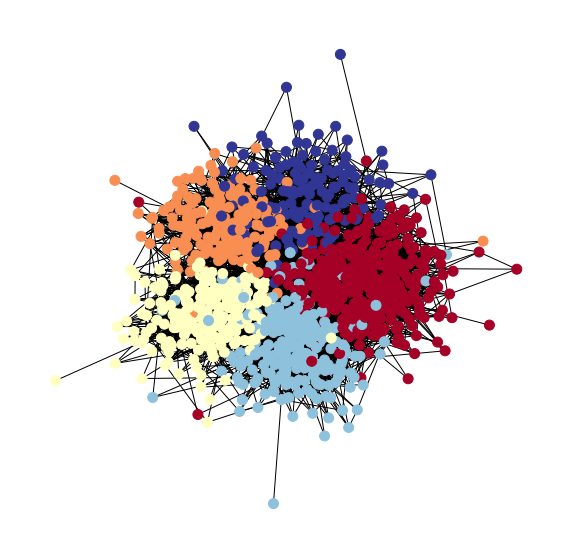

In [22]:
plt.figure(figsize =(10, 10))
posG=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=posG, node_size=100, cmap=plt.cm.RdYlBu, node_color=[v for v in z.values()])
nx.draw_networkx_edges(G,pos=posG)
plt.box(False)
plt.show()

*Pay attention that possitions should be calculated outside of the draw function otherwise it creates new possitions with every function call!*

**6. Use the network created with DC-SBM to determine the optimal partitions using Greedy algorithm and Louvain algorithm. How many communities each algorithm finds and how many nodes are members of each community. Plot networks with color highlighted community structure using the same node possitions as in the previous plot.**


*Greedy algorithm*

In [23]:
GA_comm=nx_comm.greedy_modularity_communities(G)

Number of communities found with Greedy algorithm

In [24]:
print("Number of communities found with Greedy algorithm", len(GA_comm))


for i in range(len(GA_comm)):
    print('community %d has %d members'%(i, len(GA_comm[i])))

Number of communities found with Greedy algorithm 5
community 0 has 290 members
community 1 has 213 members
community 2 has 184 members
community 3 has 157 members
community 4 has 156 members


In [25]:
z_GA={}
    
for ci in range(0,len(GA_comm)):
    for v in GA_comm[ci]:
        z_GA[v]=ci

# print(z_GA)

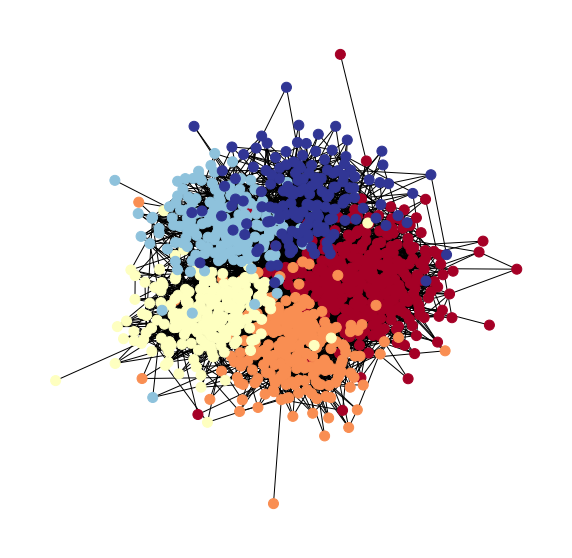

In [26]:
plt.figure(figsize =(10, 10))
nx.draw_networkx_nodes(G, pos=posG, node_size=100, nodelist=z_GA.keys(), cmap=plt.cm.RdYlBu, node_color=[v for v in z_GA.values()])
nx.draw_networkx_edges(G,pos=posG)
plt.box(False)
plt.show()

*Louvain algorithm*

In [27]:
L_comm=nx_comm.louvain_communities(G)

In [28]:
print(len(L_comm))

print("Number of communities found with Louvain algorithm", len(L_comm))


for i in range(len(L_comm)):
    print('community %d has %d members'%(i, len(L_comm[i])))

5
Number of communities found with Louvain algorithm 5
community 0 has 297 members
community 1 has 142 members
community 2 has 165 members
community 3 has 185 members
community 4 has 211 members


In [29]:
z_L={}
    
for ci in range(0,len(L_comm)):
    for v in L_comm[ci]:
        z_L[v]=ci
# print(z_L)

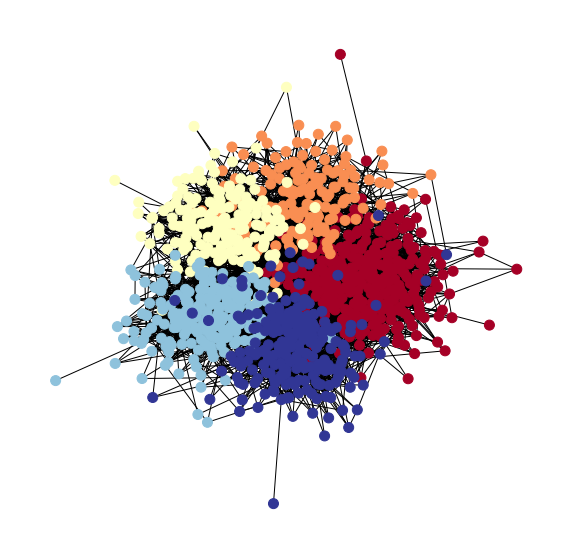

In [30]:
plt.figure(figsize =(10, 10))
nx.draw_networkx_nodes(G, pos=posG, node_size=100, nodelist=z_L.keys(), cmap=plt.cm.RdYlBu, node_color=[v for v in z_L.values()])
nx.draw_networkx_edges(G,pos=posG)
plt.box(False)
plt.show()

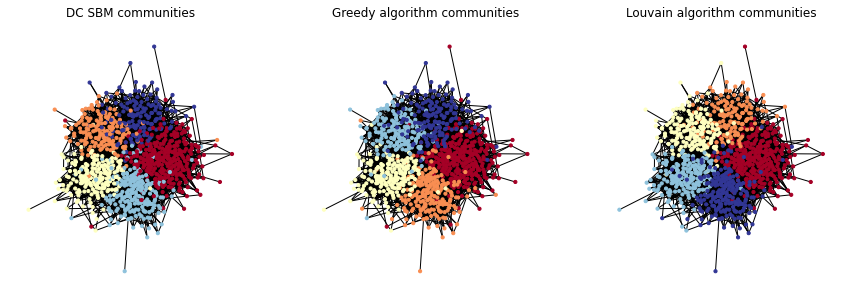

In [31]:
plt.figure(figsize =(15, 5))

plt.subplot(1,3,1)
nx.draw_networkx_nodes(G, pos=posG, node_size=10, cmap=plt.cm.RdYlBu, node_color=[v for v in z.values()])
nx.draw_networkx_edges(G,pos=posG)
plt.box(False)
plt.title('DC SBM communities')

plt.subplot(1,3,2)
nx.draw_networkx_nodes(G, pos=posG, node_size=10, nodelist=z_GA.keys(), cmap=plt.cm.RdYlBu, node_color=[v for v in z_GA.values()])
nx.draw_networkx_edges(G,pos=posG)
plt.box(False)
plt.title('Greedy algorithm communities')


plt.subplot(1,3,3)
nx.draw_networkx_nodes(G, pos=posG, node_size=10, nodelist=z_L.keys(), cmap=plt.cm.RdYlBu, node_color=[v for v in z_L.values()])
nx.draw_networkx_edges(G,pos=posG)
plt.box(False)
plt.title('Louvain algorithm communities')

plt.show()

**7. Using mutual information, compare partition found with greedy algorithm with the partition defined as input of question 5.**

*Mutual information code*

In [32]:
from math import log

def mutual_info(c_A, c_B, S):
    N_mA = len(c_A)
    N_mB = len(c_B)
    I_num = 0
    for i in c_A:
        for j in c_B:
            n_i = len(c_A[i])
            n_j = len(c_B[j])
            n_ij = len(c_A[i] & c_B[j])
            if n_ij == 0:
                continue
            log_term = log((n_ij * S) / (n_i * n_j))

            I_num += n_ij * log_term
    I_num *= -2

    I_den = 0
    for i in c_A:
        n_i = len(c_A[i])
        I_den += n_i * log(n_i / S)

    for j in c_B:
        n_j = len(c_B[j])
        I_den += n_j * log(n_j / S)

    I = I_num / I_den
    return I

Partition needs to be in the form of dictionary where key is ID of communitiy and value is set of nodes belonging to that community: {0:[1,2,3,4,5], 1:[6,7,8,9,10]} 

*Partitions based on z, z_GA*

In [33]:
c_z={}
c_GA={}
for v in z.keys():
    if z[v] in c_z.keys():
        c_z[z[v]].add(v)
    else:
        c_z[z[v]]=set([v])
    if z_GA[v] in c_GA.keys():
        c_GA[z_GA[v]].add(v)
    else:
        c_GA[z_GA[v]]=set([v])

In [34]:
In=mutual_info(c_z, c_GA, G.number_of_nodes())
print("Mutual information for ground truth partition given with vector z and greedy algorithm partition is", In)

Mutual information for ground truth partition given with vector z and greedy algorithm partition is 0.8782993966127958


**8. Run SIR model on a network generated in the first question. Use beta = 0.2 and gamma = 0.1 and initialize the outbreak at a node with highest betweenness centrality (in case of a disconnected network, focus on the largest connected component). Report the number of susceptible, infected and recovered nodes after 100 simulation steps. Plot appropriate time series plot for S, I and R quantities.**

In [35]:
N = 1000
p = 0.04
G = nx.gnp_random_graph(N, p, seed=42)

In [36]:
BETA = 0.2
GAMMA = 0.1

def initialize_node_states(G):
    state = {}
    for node in G.nodes:
        state[node] = 'S' 
    
    bcs=dict(nx.betweenness_centrality(G))
    patient_zero = max(bcs, key=bcs.get)
    
    state[patient_zero] = 'I'
    
    return state


def state_transition_SIR(G, current_state):
    next_state = {}
    for node in G.nodes: # for every node
        if current_state[node] == 'S': # we update only sussceptible individuals
            for neighbor in G.neighbors(node): # update only happens if S individual is connected to an I individual
                if current_state[neighbor] == 'I':
                    if random.random() < BETA: # disease is transmitted with probability beta
                        next_state[node] = 'I'
        elif current_state[node] == 'I':
            if random.random() < GAMMA:
                next_state[node] = 'R'

    return next_state

*Pay attention that betweenness_centrality needs to be calculated inside the initialize_node_states otherwise the model won't work for other graphs.*

In [37]:
sim = Simulation(G, initialize_node_states, state_transition_SIR, 
                 name='SIR model')
sim.run(100)

In [38]:
final_state = list((sim.state()).values())
s = final_state.count('S')
i = final_state.count('I')
r = final_state.count('R')
print(s,i,r)

0 0 1000


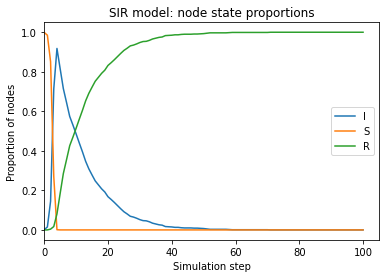

In [39]:
sim.plot()
plt.show()